In [1]:
import pandas as pd
xls = pd.ExcelFile("RawData.xlsx")
rev = xls.parse('Raw Aggregate',na_values=['NA'])

In [14]:
rev = rev.drop(rev.columns[65:231],axis = 1)

In [16]:
rev = rev.drop_duplicates(subset=['Market, Operator'])

In [17]:
revnm = rev[~rev['Market, Operator'].str.contains("Merged")]
revnm.reset_index(inplace=True,drop=True)

In [18]:
revimp = revnm.drop(['Market, Operator'],axis=1)

In [19]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
values = revimp.values
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
revclean = pd.DataFrame(imputer.fit_transform(values))

In [20]:
colname = [""]
for i in range(16):
    for j in range(4):
        if i < 10:
            colname.append("Q"+str(j+1)+" 200"+str(i))
        else:
            colname.append("Q"+str(j+1)+" 20"+str(i))


In [21]:
revclean.insert(0,"",revnm['Market, Operator'])

In [22]:
revclean.columns=colname
print(revclean)

                                                       Q1 2000       Q2 2000  \
0                                Optus (Singtel)  3.762613e+08  3.875217e+08   
1                                        Telstra  5.404273e+08  5.404273e+08   
2                  Vodafone (Vodafone Hutchison)  7.056431e+07  7.056431e+07   
3                   A1 Telekom (Telekom Austria)  3.629594e+08  3.629594e+08   
4                    T-Mobile (Deutsche Telekom)  2.721276e+08  2.710769e+08   
..                                           ...           ...           ...   
123                            US Cellular (TDS)  4.054222e+08  3.976570e+08   
124                             Verizon Wireless  6.819966e+07  6.959916e+07   
125                                          GCI  6.819966e+07  6.959916e+07   
126  Vietnamobile (CK Hutchison / Hanoi Telecom)  6.819966e+07  6.959916e+07   
127                        Gmobile (GTEL Mobile)  6.819966e+07  6.959916e+07   

          Q3 2000       Q4 2000       Q

In [67]:
forbes = pd.io.parsers.read_csv("Forbes Top2000 2017.csv")

In [12]:
forbesvalues = forbes[['Sales','Profits','Assets','Market Value']]

In [14]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
formm = trans.fit_transform(forbesvalues)
formm = pd.DataFrame(formm)

In [15]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
fornm = trans.fit_transform(forbesvalues)
fornm = pd.DataFrame(fornm)

In [16]:
formm.columns=forbes.columns.tolist()[4:8]
fornm.columns=forbes.columns.tolist()[4:8]
formm.info()
fornm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         2000 non-null   float64
 1   Profits       2000 non-null   float64
 2   Assets        2000 non-null   float64
 3   Market Value  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         2000 non-null   float64
 1   Profits       2000 non-null   float64
 2   Assets        2000 non-null   float64
 3   Market Value  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB


In [18]:
forbes.update(formm)

In [19]:
forbes.update(fornm)

In [23]:
xls = pd.ExcelFile("FranceMarketData.xlsx")
francedata = xls.parse('Sheet1',index_col=None, na_values = 'Na')

In [24]:
francedata = francedata.drop(columns=['Metric','Attribute'])
francedata.columns=francedata.iloc[0]
francedata = francedata[1:5]

In [25]:
francedata['Market Share'] = francedata['Connections excluding Cellular M2M']/francedata['Connections excluding Cellular M2M'].sum()
francedata['Smartphone Adotion'] = francedata['Smartphone Connections']/francedata['Connections excluding Cellular M2M']
francedata['Market Penetration'] = francedata['Connections excluding Cellular M2M']/65842794
francedata

,NaN,Connections including Cellular M2M,Connections excluding Cellular M2M,Smartphone Connections,Market Share,Smartphone Adotion,Market Penetration
1,Bouygues Telecom,16207697,11864712,9452224,0.166275,0.796667,0.180198
2,SFR (Altice),31005487,24988692,16390930,0.350197,0.655934,0.379521
3,Orange,38747161,20658604,20870894,0.289515,1.010276,0.313756
4,Free Mobile (Iliad),13844000,13844000,10806534,0.194013,0.780593,0.210258


In [58]:
revagg = revclean.T

In [59]:
revagg.columns=revagg.iloc[0]

In [60]:
revagg = revagg.drop('')

In [61]:
revagg.reset_index(inplace=True, drop=True)
index = pd.date_range('1/1/2000', periods=64, freq='Q')
revagg.insert(0, "Date", index)
revagg.set_index('Date',inplace= True, drop=True)
revagg

,Optus (Singtel),Telstra,Vodafone (Vodafone Hutchison),A1 Telekom (Telekom Austria),T-Mobile (Deutsche Telekom),3 (CK Hutchison),banglalink (Global Telecom),Citycell (Pacific Bangladesh),Grameenphone (Telenor),Robi (Axiata),...,lifecell (Turkcell),TriMob (Ukrtelecom),AT&T,Cincinnati Bell Wireless (Closed Q1 2015),Sprint (SoftBank),US Cellular (TDS),Verizon Wireless,GCI,Vietnamobile (CK Hutchison / Hanoi Telecom),Gmobile (GTEL Mobile)
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,376261271.587,540427303.75,70564313.5,362959380.0,272127600.3677,68199656.75,1658218.4359,2819803.9673,8313046.2557,2692159.2729,...,68199656.75,68199656.75,2909000000.0,36600000.0,1177000000.0,405422205.0,68199656.75,68199656.75,68199656.75,68199656.75
2000-06-30,387521710.2256,540427303.75,70564313.5,362959380.0,271076914.6009,69599156.75,1708109.5209,2924993.6302,9744190.8932,2673137.1342,...,69599156.75,69599156.75,3167000000.0,43000000.0,1460000000.0,397657000.0,69599156.75,69599156.75,69599156.75,69599156.75
2000-09-30,387952623.4482,561192135.0,75583985.75,392084388.0,273178286.1346,75583985.75,1639961.2754,2838644.3409,10616309.246,2488011.2648,...,75583985.75,75583985.75,3323000000.0,49100000.0,1673000000.0,414199000.0,4057000000.0,75583985.75,75583985.75,75583985.75
2000-12-31,420121838.0361,561192135.0,75583985.75,379287036.0,286837200.0,77387000.0,1674359.0602,2915890.8464,22038290.0,2638472.9739,...,77387000.0,77387000.0,3245000000.0,51300000.0,2031000000.0,544697000.0,4084000000.0,77387000.0,77387000.0,77387000.0
2001-03-31,464695135.8307,578165127.5,76739593.75,408522366.0,285733980.0,72160030.575,1810272.3146,3496930.4567,27025903.0,3101085.6366,...,72160030.575,72160030.575,3333000000.0,57100000.0,2051000000.0,439769000.0,4046000000.0,72160030.575,72160030.575,72160030.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,1107939170.0,1923726192.5,639051224.0,352915699.3198,233882640.0,189753840.0,147213675.0,6247194.6486,336973077.0,173198676.0,...,41278707.9,5282525.7325,19859000000.0,16800000.0,8433000000.0,1008744000.0,23449000000.0,71204000.0,27438123.176,11462718.0
2015-03-31,1081937990.0,1922642810.0,640929087.0,313424802.0,217334340.0,195821550.0,148561323.4078,5772537.1125,327125216.586,158106837.0,...,41763783.0,5739210.1362,18186000000.0,296214570.0,7772000000.0,965245000.0,22328000000.0,77408000.0,25075716.5253,10440419.0
2015-06-30,1107216915.0,1922642810.0,640929087.0,323343429.3835,226160100.0,195821550.0,152906282.4574,5583425.2947,341910110.199,168365469.9087,...,42418437.2,5947206.9475,18304000000.0,294449418.0,7540000000.0,975667000.0,22613000000.0,90892000.0,23615157.5357,9832306.0


In [62]:
revagg = revagg.resample('A').sum()
revagg

,Optus (Singtel),Telstra,Vodafone (Vodafone Hutchison),A1 Telekom (Telekom Austria),T-Mobile (Deutsche Telekom),3 (CK Hutchison),banglalink (Global Telecom),Citycell (Pacific Bangladesh),Grameenphone (Telenor),Robi (Axiata),...,lifecell (Turkcell),TriMob (Ukrtelecom),AT&T,Cincinnati Bell Wireless (Closed Q1 2015),Sprint (SoftBank),US Cellular (TDS),Verizon Wireless,GCI,Vietnamobile (CK Hutchison / Hanoi Telecom),Gmobile (GTEL Mobile)
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,1.571857e+09,2.203239e+09,2.922966e+08,1.497290e+09,1.103220e+09,2.907698e+08,6.680648e+06,1.149933e+07,5.071184e+07,1.049178e+07,...,2.907698e+08,2.907698e+08,1.264400e+10,1.800000e+08,6.341000e+09,1.761975e+09,8.278799e+09,2.907698e+08,2.907698e+08,2.907698e+08
2001-12-31,1.760421e+09,2.419554e+09,3.023359e+08,1.590512e+09,1.158381e+09,2.961507e+08,7.453037e+06,1.788828e+07,1.353615e+08,1.542207e+07,...,2.961507e+08,2.961507e+08,1.426800e+10,2.480000e+08,9.725000e+09,1.894830e+09,1.739300e+10,2.961507e+08,2.961507e+08,2.961507e+08
2002-12-31,1.995591e+09,2.543782e+09,1.641686e+08,1.697007e+09,1.140729e+09,3.324737e+08,8.753426e+06,2.710176e+07,1.843097e+08,2.657462e+07,...,3.324737e+08,3.324737e+08,1.472700e+10,2.604000e+08,1.207400e+10,2.205634e+09,1.926000e+10,3.324737e+08,3.324737e+08,3.324737e+08
2003-12-31,2.421721e+09,2.883242e+09,2.456389e+08,1.784000e+09,1.211336e+09,9.711302e+07,9.583968e+06,3.172576e+07,1.781622e+08,4.741426e+07,...,3.969297e+08,3.969297e+08,1.537800e+10,2.595000e+08,1.269000e+10,2.582783e+09,2.248900e+10,3.969297e+08,3.969297e+08,3.969297e+08
2004-12-31,2.712790e+09,3.271815e+09,5.546398e+08,1.851975e+09,9.741433e+08,1.108345e+08,1.567938e+07,3.713350e+07,2.535563e+08,9.826517e+07,...,5.190944e+08,5.190944e+08,1.943600e+10,2.617000e+08,1.464700e+10,2.837619e+09,2.766200e+10,5.190944e+08,5.190944e+08,5.190944e+08
2005-12-31,2.870241e+09,3.468269e+09,6.615856e+08,1.891912e+09,9.763497e+08,2.800225e+08,3.903600e+07,3.332998e+07,3.444933e+08,1.128443e+08,...,2.409455e+07,5.807608e+08,3.443300e+10,2.375000e+08,2.420400e+10,3.033208e+09,3.230100e+10,5.807608e+08,5.807608e+08,5.807608e+08
2006-12-31,3.008192e+09,3.815673e+09,7.641458e+08,1.904820e+09,1.267600e+09,3.743591e+08,9.352000e+07,4.205603e+07,5.003852e+08,1.643984e+08,...,8.794900e+07,6.693932e+08,3.750600e+10,2.620000e+08,3.510000e+10,3.473582e+09,3.804300e+10,6.693932e+08,6.693932e+08,6.693932e+08
2007-12-31,3.097752e+09,4.404311e+09,9.524377e+08,1.831566e+09,1.304006e+09,4.098337e+08,1.931440e+08,5.570282e+07,7.058866e+08,1.870556e+08,...,2.528210e+08,5.068238e+08,4.268400e+10,2.945000e+08,3.470000e+10,3.946264e+09,4.388200e+10,5.682500e+07,4.747161e+06,6.916934e+08
2008-12-31,3.435045e+09,4.815274e+09,1.172437e+09,1.840171e+09,1.196994e+09,3.565617e+08,2.881440e+08,5.990452e+07,7.976054e+08,1.900064e+08,...,4.367160e+08,1.380295e+06,4.921400e+10,3.161000e+08,3.042700e+10,4.243185e+09,4.933200e+10,6.891300e+07,8.799739e+06,8.042012e+08


In [34]:
forbes = pd.io.parsers.read_csv("Forbes Top2000 2017.csv")

In [35]:
ict = ['Information Technology', 'Telecommunication Services']
inf = ['Energy', 'Utilities']
a = forbes['Sector'].str.contains('|'.join(ict))
b = forbes['Sector'].str.contains('|'.join(inf))
for i in forbes.index:
    if a[i] == True:
        forbes['Sector'][i] = "ICT"
    elif b[i] == True:
        forbes['Sector'][i] = "Infra"
    else:
        pass 

<ipython-input-35-18794f356d94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forbes['Sector'][i] = "ICT"
<ipython-input-35-18794f356d94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forbes['Sector'][i] = "Infra"


In [36]:
any(forbes['Sector']=="Telecommunication Services")

False

In [37]:
any(forbes['Sector']=="Information Technology")

False

In [39]:
revdisc = revagg[-1:].values
revdisc

array([[4.47653649e+09, 7.83646675e+09, 2.63738636e+09, 1.32211954e+09,
        9.14569380e+08, 8.11969920e+08, 6.12764337e+08, 2.14943194e+07,
        1.36171570e+09, 6.81080087e+08, 1.70480560e+08, 1.84301164e+08,
        3.60013783e+09, 7.46879940e+08, 1.20284077e+09, 1.65041712e+09,
        4.98339615e+09, 2.61052393e+08, 5.57752544e+09, 3.62998330e+08,
        5.05410847e+09, 2.61759965e+08, 2.94236884e+08, 2.21853796e+09,
        7.85994825e+08, 5.92442128e+08, 2.37182060e+07, 6.74771877e+08,
        5.29084038e+08, 5.61230518e+08, 2.55697742e+06, 3.88554084e+09,
        6.64064261e+08, 1.84179615e+09, 5.99611102e+09, 2.01745841e+09,
        7.53729566e+09, 9.08611992e+09, 2.57885037e+09, 1.74253192e+09,
        5.15612367e+09, 1.20284077e+09, 2.76307323e+09, 1.20284077e+09,
        1.26610957e+08, 1.36358829e+08, 2.14997046e+08, 2.02934832e+09,
        7.80099637e+07, 1.49291639e+09, 1.20284077e+09, 1.76127250e+09,
        5.65925255e+09, 1.70845725e+09, 2.25146432e+08, 3.785557

In [40]:
eqw4 = pd.cut(revdisc[0],bins=4)
eqw8 = pd.cut(revdisc[0],bins=8)
eqw16 = pd.cut(revdisc[0],bins=16)

In [41]:
eqw4.value_counts()

(-91293854.002, 22920289320.178]      122
(22920289320.178, 45840192880.119]      4
(45840192880.119, 68760096440.059]      0
(68760096440.059, 91680000000.0]        2
dtype: int64

In [42]:
eqw8.value_counts()

(-91293854.002, 11460337540.208]      122
(11460337540.208, 22920289320.178]      0
(22920289320.178, 34380241100.149]      3
(34380241100.149, 45840192880.119]      1
(45840192880.119, 57300144660.089]      0
(57300144660.089, 68760096440.059]      0
(68760096440.059, 80220048220.03]       1
(80220048220.03, 91680000000.0]         1
dtype: int64

In [43]:
eqw16.value_counts()

(-91293854.002, 5730361650.223]       116
(5730361650.223, 11460337540.208]       6
(11460337540.208, 17190313430.193]      0
(17190313430.193, 22920289320.178]      0
(22920289320.178, 28650265210.163]      2
(28650265210.163, 34380241100.149]      1
(34380241100.149, 40110216990.134]      1
(40110216990.134, 45840192880.119]      0
(45840192880.119, 51570168770.104]      0
(51570168770.104, 57300144660.089]      0
(57300144660.089, 63030120550.074]      0
(63030120550.074, 68760096440.059]      0
(68760096440.059, 74490072330.045]      1
(74490072330.045, 80220048220.03]       0
(80220048220.03, 85950024110.015]       0
(85950024110.015, 91680000000.0]        1
dtype: int64

In [44]:
eqf4 = pd.qcut(revdisc[0],q=4)
eqf8 = pd.qcut(revdisc[0],q=8)
eqf16 = pd.qcut(revdisc[0],q=16)

In [45]:
eqf4.value_counts()

(385760.237, 338679065.0]         32
(338679065.0, 1202840766.0]       35
(1202840766.0, 2831871895.35]     29
(2831871895.35, 91680000000.0]    32
dtype: int64

In [46]:
eqf8.value_counts()

(385760.237, 122327304.975]        16
(122327304.975, 338679065.0]       16
(338679065.0, 587636249.594]       16
(587636249.594, 1202840766.0]      19
(1202840766.0, 1755223535.231]     13
(1755223535.231, 2831871895.35]    16
(2831871895.35, 5066860368.62]     16
(5066860368.62, 91680000000.0]     16
dtype: int64

In [47]:
eqf16.value_counts()

(385760.237, 38307712.109]           8
(38307712.109, 122327304.975]        8
(122327304.975, 182845155.776]       8
(182845155.776, 338679065.0]         8
(338679065.0, 446273657.358]         8
(446273657.358, 587636249.594]       8
(587636249.594, 800605815.938]       8
(800605815.938, 1202840766.0]       11
(1202840766.0, 1387892876.891]       5
(1387892876.891, 1755223535.231]     8
(1755223535.231, 2037800688.293]     8
(2037800688.293, 2831871895.35]      8
(2831871895.35, 3868698873.621]      8
(3868698873.621, 5066860368.62]      8
(5066860368.62, 8389627245.0]        8
(8389627245.0, 91680000000.0]        8
dtype: int64

In [23]:
revsvd = revnm.copy()

In [24]:
revsvd.fillna(0, inplace=True)

In [25]:
revsvd.drop(columns='Market, Operator', inplace=True)
revsvd

,Q1 2000,Q2 2000,Q3 2000,Q4 2000,Q1 2001,Q2 2001,Q3 2001,Q4 2001,Q1 2002,Q2 2002,...,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015
0,3.762613e+08,3.875217e+08,3.879526e+08,4.201218e+08,4.646951e+08,4.073518e+08,4.138521e+08,4.745215e+08,4.615209e+08,4.701880e+08,...,9.699885e+08,1.013061e+09,9.362292e+08,9.557495e+08,1.006101e+09,1.107939e+09,1.081938e+09,1.107217e+09,1.115162e+09,1.172220e+09
1,5.404273e+08,5.404273e+08,5.611921e+08,5.611921e+08,5.781651e+08,5.781651e+08,6.052497e+08,6.579743e+08,6.038052e+08,6.377512e+08,...,1.755441e+09,1.755441e+09,1.735940e+09,1.735940e+09,1.923726e+09,1.923726e+09,1.922643e+09,1.922643e+09,1.995591e+09,1.995591e+09
2,7.056431e+07,7.056431e+07,7.558399e+07,7.558399e+07,7.673959e+07,7.673959e+07,7.442838e+07,7.442838e+07,4.125809e+07,4.125809e+07,...,6.529907e+08,6.529907e+08,6.231616e+08,6.231616e+08,6.390512e+08,6.390512e+08,6.409291e+08,6.409291e+08,6.777641e+08,6.777641e+08
3,3.629594e+08,3.629594e+08,3.920844e+08,3.792870e+08,4.085224e+08,3.787354e+08,4.049921e+08,3.982624e+08,4.181085e+08,4.035616e+08,...,3.535244e+08,3.585230e+08,3.163726e+08,3.297373e+08,3.357172e+08,3.529157e+08,3.134248e+08,3.233434e+08,3.358279e+08,3.495234e+08
4,2.721276e+08,2.710769e+08,2.731783e+08,2.868372e+08,2.857340e+08,2.846308e+08,2.868372e+08,3.011791e+08,2.802179e+08,2.680825e+08,...,2.482245e+08,2.239537e+08,2.118182e+08,2.217472e+08,2.316762e+08,2.338826e+08,2.173343e+08,2.261601e+08,2.283665e+08,2.427084e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4.054222e+08,3.976570e+08,4.141990e+08,5.446970e+08,4.397690e+08,4.752890e+08,5.010240e+08,4.787480e+08,4.784200e+08,5.277100e+08,...,9.392360e+08,9.027240e+08,9.258110e+08,9.577730e+08,1.000419e+09,1.008744e+09,9.652450e+08,9.756670e+08,1.068906e+09,9.870350e+08
124,0.000000e+00,0.000000e+00,4.057000e+09,4.084000e+09,4.046000e+09,4.383000e+09,4.521000e+09,4.443000e+09,4.374000e+09,4.738000e+09,...,2.039900e+10,2.112500e+10,2.087900e+10,2.148300e+10,2.183500e+10,2.344900e+10,2.232800e+10,2.261300e+10,2.300500e+10,2.373400e+10
125,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.397900e+07,6.957700e+07,7.075300e+07,7.654600e+07,8.522100e+07,7.120400e+07,7.740800e+07,9.089200e+07,1.019110e+08,8.136100e+07
126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.019908e+07,3.310748e+07,2.948697e+07,2.863828e+07,2.786081e+07,2.743812e+07,2.507572e+07,2.361516e+07,2.208803e+07,2.156283e+07


In [26]:
import numpy as np
import scipy.linalg
from scipy.linalg import svd

In [27]:
A = np.asmatrix(revsvd.values)
A

matrix([[3.76261272e+08, 3.87521710e+08, 3.87952623e+08, ...,
         1.10721692e+09, 1.11516172e+09, 1.17221986e+09],
        [5.40427304e+08, 5.40427304e+08, 5.61192135e+08, ...,
         1.92264281e+09, 1.99559056e+09, 1.99559056e+09],
        [7.05643135e+07, 7.05643135e+07, 7.55839858e+07, ...,
         6.40929087e+08, 6.77764092e+08, 6.77764092e+08],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.08920000e+07, 1.01911000e+08, 8.13610000e+07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.36151575e+07, 2.20880341e+07, 2.15628341e+07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.83230600e+06, 9.19648100e+06, 8.97781100e+06]])

In [53]:
U, S, VT = svd(A)

In [54]:
smatrix = np.zeros((len(S),len(S)))
smatrix[:len(S),:len(S)]= np.diag(S)

In [31]:
a = []
for k in range(len(S)):
    sm = smatrix[:k,:k]
    VTm = VT[:k,:]
    Um = U[:,:k]
    B = Um.dot(sm.dot(VTm))
    C = A-B
    a.append(abs(C.sum()))

In [32]:
arr = np.array(a)
b = arr<1000000
#find the smallest index i whose b[i] is TRUE

In [63]:
revhist = revagg[-1:].values.T

In [64]:
data = pd.DataFrame(revhist)
data

,0
0,4.476536e+09
1,7.836467e+09
2,2.637386e+09
3,1.322120e+09
4,9.145694e+08
...,...
123,3.996853e+09
124,9.168000e+10
125,3.515720e+08
126,9.234174e+07


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

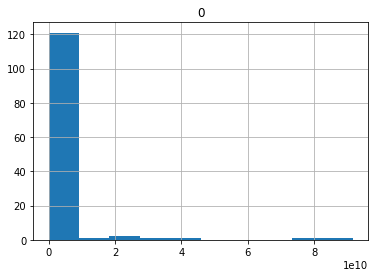

In [65]:
data.hist()

In [68]:
samn = forbes.sample(n=400,random_state=1000)
samn

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
82,NaN,83,Amazon.com,United States,136.000,2.400,86.0,427.0,Consumer Discretionary,Internet & Catalog Retail
1935,NaN,1936,Korea Investment Holdings,South Korea,1.300,0.241,30.9,2.4,Financials,NaN
1639,NaN,1640,Eurobank Ergasias,Greece,2.200,0.254,70.0,1.4,NaN,NaN
1591,NaN,1592,Avis Budget Group,United States,8.700,0.163,17.8,2.3,Financials,Rental & Leasing
1433,NaN,1434,UBI Banca,Italy,4.600,-0.918,118.5,3.6,Financials,Regional Banks
...,...,...,...,...,...,...,...,...,...,...
1253,NaN,1254,Huntington Ingalls Industries,United States,7.100,0.573,6.9,9.4,Industrials,NaN
1805,NaN,1806,Keiyo Bank,Japan,0.627,0.125,40.0,1.1,Financials,Regional Banks
1269,NaN,1270,China Life Insurance (Taiwan),Taiwan,7.600,0.294,41.1,3.4,Financials,Life & Health Insurance
1495,NaN,1496,Hokuhoku Financial Group,Japan,1.700,0.279,104.9,2.0,Financials,Regional Banks


In [69]:
samf = data.sample(frac=0.1,random_state=1000)
samf

,0
98,4.543456e+09
39,1.742532e+09
96,3.847918e+09
127,3.844702e+07
23,2.218538e+09
90,3.621814e+07
33,1.841796e+09
116,4.932823e+08
44,1.266110e+08
48,7.800996e+07
